In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
#import statsmodels.api as sm

In [8]:
df =  pd.read_csv('C:/Users/Admin/Downloads/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1335,18.0,female,36.850,0.0,no,southeast,1629.83350
1336,21.0,female,25.800,0.0,no,southwest,2007.94500


In [9]:
df.shape

(1338, 7)

In [10]:
df.dtypes

age         float64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges     float64
dtype: object

In [11]:
df.describe()

,age,bmi,children,charges
count,1335.000000,1334.000000,1335.000000,1338.000000
mean,39.214232,30.665390,1.094382,13270.422265
std,14.051488,6.098268,1.206587,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df.isnull().sum()

age         3
sex         0
bmi         4
children    3
smoker      0
region      0
charges     0
dtype: int64

In [15]:
df['age'] = df['age'].fillna(df['age'].median())
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df['children'] = df['children'].fillna(df['children'].mode()[0])

In [16]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

sex  sex
male      676
female    662
Name: count, dtype: int64


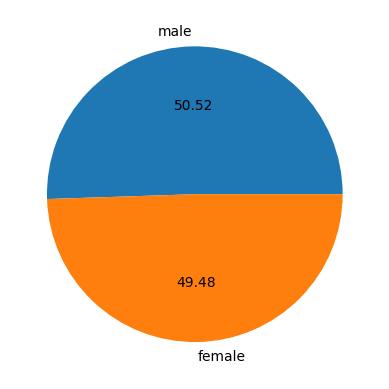

In [17]:
sex = df['sex'].value_counts()
print('sex ',sex)
plt.pie(sex,labels=sex.index,autopct='%.2f')
plt.show()

smoker  smoker
no     1064
yes     274
Name: count, dtype: int64


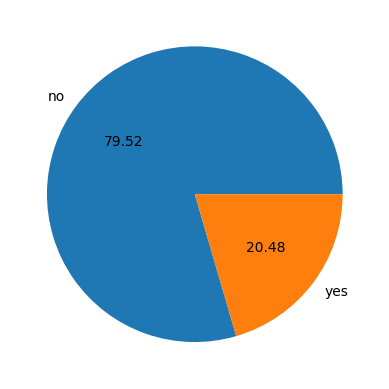

In [18]:
smoker = df['smoker'].value_counts()
print('smoker ',smoker)
plt.pie(smoker,labels=smoker.index,autopct='%.2f')
plt.show()

In [19]:
sns.pairplot

<function seaborn.axisgrid.pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)>

<Axes: xlabel='age', ylabel='charges'>

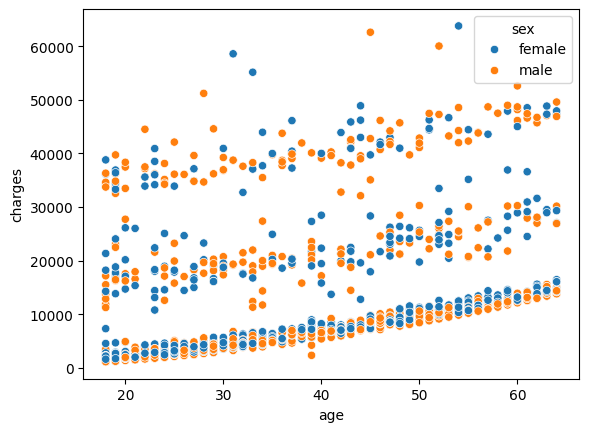

In [20]:
sns.scatterplot(data=df,x=df['age'],y=df['charges'],hue=df['sex'])

In [21]:
df['region'].value_counts()  

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [22]:
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])

In [24]:
#from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the 'region' column
encoded_regions = encoder.fit_transform(df[['region']])

# Convert the encoded regions into a DataFrame
encoded_df = pd.DataFrame(encoded_regions, columns=encoder.get_feature_names_out(['region']))

# Concatenate the encoded columns with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)


In [25]:
df = df.drop(df[['region']],axis=1)

In [26]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,0,27.900,0.0,1,16884.92400,0.0,0.0,0.0,1.0
1,18.0,1,33.770,1.0,0,1725.55230,0.0,0.0,1.0,0.0
2,28.0,1,33.000,3.0,0,4449.46200,0.0,0.0,1.0,0.0
3,33.0,1,22.705,0.0,0,21984.47061,0.0,1.0,0.0,0.0
4,32.0,1,28.880,0.0,0,3866.85520,0.0,1.0,0.0,0.0


In [27]:
df.dtypes

age                 float64
sex                   int64
bmi                 float64
children            float64
smoker                int64
charges             float64
region_northeast    float64
region_northwest    float64
region_southeast    float64
region_southwest    float64
dtype: object

Linear Regression

In [28]:
X = df[['age']]
y = df[['charges']].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, train_size=0.75) 

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(X_train,y_train)

LinearRegression()

In [31]:
y_predict = lr.predict(X_test)

In [32]:
print("MAE ",mean_absolute_error(y_test,y_predict))

MAE  9235.417992644938


In [33]:
print("MSE ",mean_squared_error(y_test,y_predict))

MSE  141304403.915372


In [34]:
print("R2 Score ",r2_score(y_test,y_predict))

R2 Score  0.09917193528798884


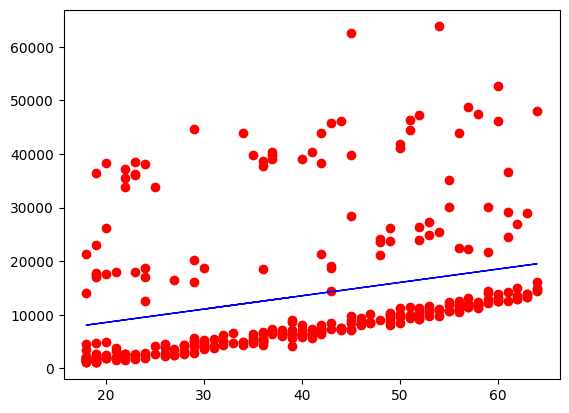

In [41]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,lr.predict(X_test),color='blue',linewidth=1)

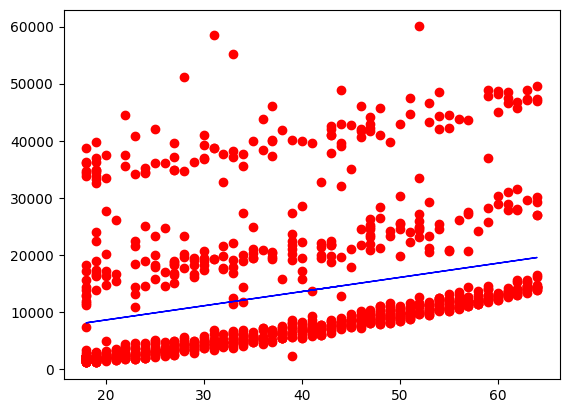

In [42]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,lr.predict(X_train),color='blue',linewidth=1)

Multiple Regression

In [43]:
X = df.drop("charges", axis='columns')
y = df[['charges']].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, train_size=0.75) 

In [44]:
X

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,0,27.900,0.0,1,0.0,0.0,0.0,1.0
1,18.0,1,33.770,1.0,0,0.0,0.0,1.0,0.0
2,28.0,1,33.000,3.0,0,0.0,0.0,1.0,0.0
3,33.0,1,22.705,0.0,0,0.0,1.0,0.0,0.0
4,32.0,1,28.880,0.0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3.0,0,0.0,1.0,0.0,0.0
1334,18.0,0,31.920,0.0,0,1.0,0.0,0.0,0.0
1335,18.0,0,36.850,0.0,0,0.0,0.0,1.0,0.0
1336,21.0,0,25.800,0.0,0,0.0,0.0,0.0,1.0


In [45]:
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [46]:
X_train.shape, y_train.shape

((1003, 9), (1003, 1))

In [47]:
X_test.shape, y_test.shape

((335, 9), (335, 1))

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(X_train,y_train)

LinearRegression()

In [50]:
X_test

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
450,39.0,1,29.600,4.0,0,0.0,0.0,0.0,1.0
77,21.0,1,35.530,0.0,0,0.0,0.0,1.0,0.0
94,64.0,0,31.300,2.0,1,0.0,0.0,0.0,1.0
1057,45.0,0,31.790,0.0,0,0.0,0.0,1.0,0.0
280,40.0,0,28.120,1.0,1,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
127,52.0,0,37.400,0.0,0,0.0,0.0,0.0,1.0
1177,40.0,0,27.400,1.0,0,0.0,0.0,0.0,1.0
743,31.0,0,26.620,0.0,0,0.0,0.0,1.0,0.0
161,18.0,0,36.850,0.0,1,0.0,0.0,1.0,0.0


In [51]:
y_test

array([[ 7512.267  ],
       [ 1532.4697 ],
       [47291.055  ],
       [17929.30337],
       [22331.5668 ],
       [ 5152.134  ],
       [ 6186.127  ],
       [ 6358.77645],
       [ 4454.40265],
       [13429.0354 ],
       [11538.421  ],
       [45710.20785],
       [ 9391.346  ],
       [41919.097  ],
       [ 9583.8933 ],
       [13887.9685 ],
       [46661.4424 ],
       [10435.06525],
       [ 9866.30485],
       [55135.40209],
       [34303.1672 ],
       [ 3484.331  ],
       [25081.76784],
       [42969.8527 ],
       [ 8688.85885],
       [ 7160.3303 ],
       [34779.615  ],
       [12347.172  ],
       [19719.6947 ],
       [43753.33705],
       [ 3994.1778 ],
       [11305.93455],
       [10713.644  ],
       [24180.9335 ],
       [13393.756  ],
       [15019.76005],
       [16796.41194],
       [ 6593.5083 ],
       [12949.1554 ],
       [ 3766.8838 ],
       [21595.38229],
       [ 8027.968  ],
       [ 2396.0959 ],
       [40932.4295 ],
       [ 2709.24395],
       [ 9

In [52]:
m = lr.coef_

In [53]:
b = lr.intercept_

In [54]:
y = m * 19 + b
y

array([[ -7751.31924736, -11032.3581347 ,  -6378.23816881,
         -2722.21157242, 435786.65175486,    549.43295689,
        -14750.5764947 , -19658.78757274, -16881.7908714 ]])

In [55]:
y_predict = lr.predict(X_test)

In [56]:
y_test

array([[ 7512.267  ],
       [ 1532.4697 ],
       [47291.055  ],
       [17929.30337],
       [22331.5668 ],
       [ 5152.134  ],
       [ 6186.127  ],
       [ 6358.77645],
       [ 4454.40265],
       [13429.0354 ],
       [11538.421  ],
       [45710.20785],
       [ 9391.346  ],
       [41919.097  ],
       [ 9583.8933 ],
       [13887.9685 ],
       [46661.4424 ],
       [10435.06525],
       [ 9866.30485],
       [55135.40209],
       [34303.1672 ],
       [ 3484.331  ],
       [25081.76784],
       [42969.8527 ],
       [ 8688.85885],
       [ 7160.3303 ],
       [34779.615  ],
       [12347.172  ],
       [19719.6947 ],
       [43753.33705],
       [ 3994.1778 ],
       [11305.93455],
       [10713.644  ],
       [24180.9335 ],
       [13393.756  ],
       [15019.76005],
       [16796.41194],
       [ 6593.5083 ],
       [12949.1554 ],
       [ 3766.8838 ],
       [21595.38229],
       [ 8027.968  ],
       [ 2396.0959 ],
       [40932.4295 ],
       [ 2709.24395],
       [ 9

In [57]:
print("MAE ",mean_absolute_error(y_test,y_predict))

MAE  4356.803188529342


In [58]:
print("MSE ",mean_squared_error(y_test,y_predict))

MSE  39654999.753067575


In [59]:
print("R2 Score ",r2_score(y_test,y_predict))

R2 Score  0.7505157202956549
